In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Summary

This notebook contains the plots and figures that we used in the report. Since we had difficulties in making figures with PySpark, we converted the *parquet* files in to Pandas Data frame. All figures below will be pasted into the main notebook. 

## Get the data containing the average tone and mentions of Russo-Ukraine news

In [3]:
# get the data containing the average tone
# and mentions of Russo-Ukraine news
df_war = pd.read_parquet(
            's3://bdcc-lab2-bucket/war_mentions_and_tone.parquet',
            engine='pyarrow')
df_war.head()

,MonthYear,NumMentions,AvgTone
0,2014-01-01,829.0,2.251877
1,2014-02-01,22199.0,1.995719
2,2014-03-01,124816.0,1.981156
3,2014-04-01,64514.0,1.703117
4,2014-05-01,42644.0,1.788161


In [4]:
# describe series info
df_war.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MonthYear    69 non-null     object 
 1   NumMentions  69 non-null     float64
 2   AvgTone      69 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


In [5]:
# convert MonthYear column to datetime
df_war['MonthYear'] = pd.to_datetime(df_war['MonthYear'])

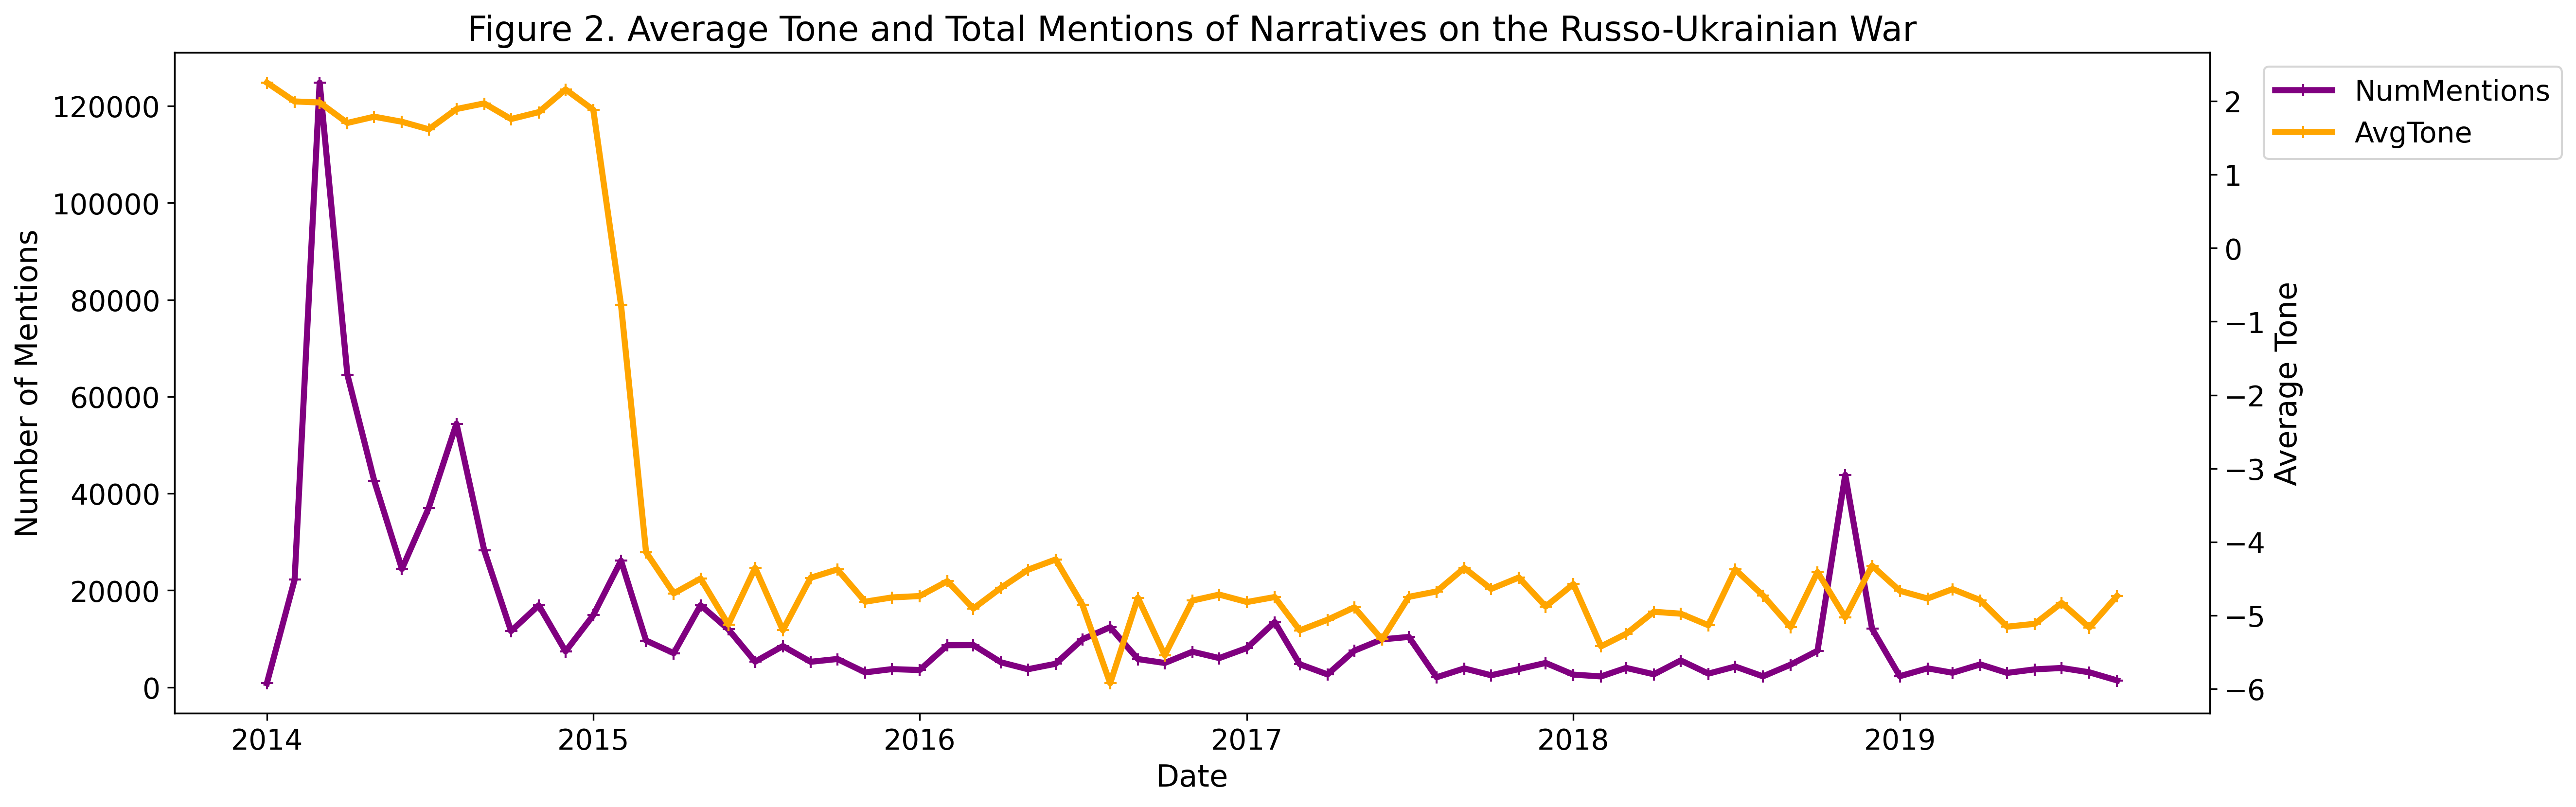

In [7]:
# Showing the plot describing the NumMentions and AvgTone
%matplotlib inline
fig, ax = plt.subplots(figsize=(18,6), dpi=300)

ax.plot(df_war['MonthYear'], df_war['NumMentions'],
        color='purple', marker='+', lw=3, label='NumMentions')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Number of Mentions', fontsize=15)

ax2=ax.twinx()
ax2.plot(df_war['MonthYear'], df_war['AvgTone'],
         color='orange', marker='+', lw=3, label='AvgTone')
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('Average Tone', fontsize=15)
plt.title('Figure 2. Average Tone and Total Mentions '
          'of Narratives on the Russo-Ukrainian War',
          fontsize=17)


ax.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels, bbox_to_anchor=[1.18,1], fontsize=14)

plt.show()


## Get the data describing the Goldstein Scale and Number of mentions of Russia and Ukraine relations

In [8]:
# show Ukraine and other countries goldstein scale and
# number of mentions in the articles
ukr_others_goldstein = pd.read_parquet(
            's3://bdcc-lab2-bucket/men_tone_gold_ukr_others.parquet',
            engine='pyarrow')
ukr_others_goldstein.head()

,MonthYear,NumMentions,AvgTone,GoldSteinScale
0,2014-01-01,101873,1.863119,0.063736
1,2014-02-01,604932,1.769710,0.243230
2,2014-03-01,1324056,1.722296,0.737732
3,2014-04-01,845432,1.474440,0.453373
4,2014-05-01,678104,1.460561,-0.606083


In [9]:
# show Russia and other countries goldstein scale and
# number of mentions in the articles

rus_others_goldstein = pd.read_parquet(
            's3://bdcc-lab2-bucket/men_tone_gold_rus_others.parquet',
            engine='pyarrow')
rus_others_goldstein.head()

,MonthYear,NumMentions,AvgTone,GoldSteinScale
0,2014-01-01,338101,1.921092,1.296611
1,2014-02-01,690863,1.865411,0.938067
2,2014-03-01,2212974,1.633652,0.409587
3,2014-04-01,1215573,1.505789,0.390255
4,2014-05-01,935214,1.643722,0.664548


In [10]:
# show Ukraine and Russia goldstein scale and
# number of mentions in the articles
rus_ukr_goldstein = pd.read_parquet(
            's3://bdcc-lab2-bucket/men_tone_gold_ukr_rus.parquet',
            engine='pyarrow')
rus_ukr_goldstein.head()

,MonthYear,NumMentions,AvgTone,GoldSteinScale
0,2014-01-01,10522,1.772145,0.753497
1,2014-02-01,103531,1.601408,0.002040
2,2014-03-01,498013,1.530496,-0.120684
3,2014-04-01,324908,1.278173,-0.564138
4,2014-05-01,236309,1.317931,-1.210535


In [11]:
# convert MonthYear column to datetime
rus_ukr_goldstein['MonthYear'] = pd.to_datetime(rus_ukr_goldstein['MonthYear'])
ukr_others_goldstein['MonthYear'] = pd.to_datetime(ukr_others_goldstein['MonthYear'])
rus_others_goldstein['MonthYear'] = pd.to_datetime(rus_others_goldstein['MonthYear'])

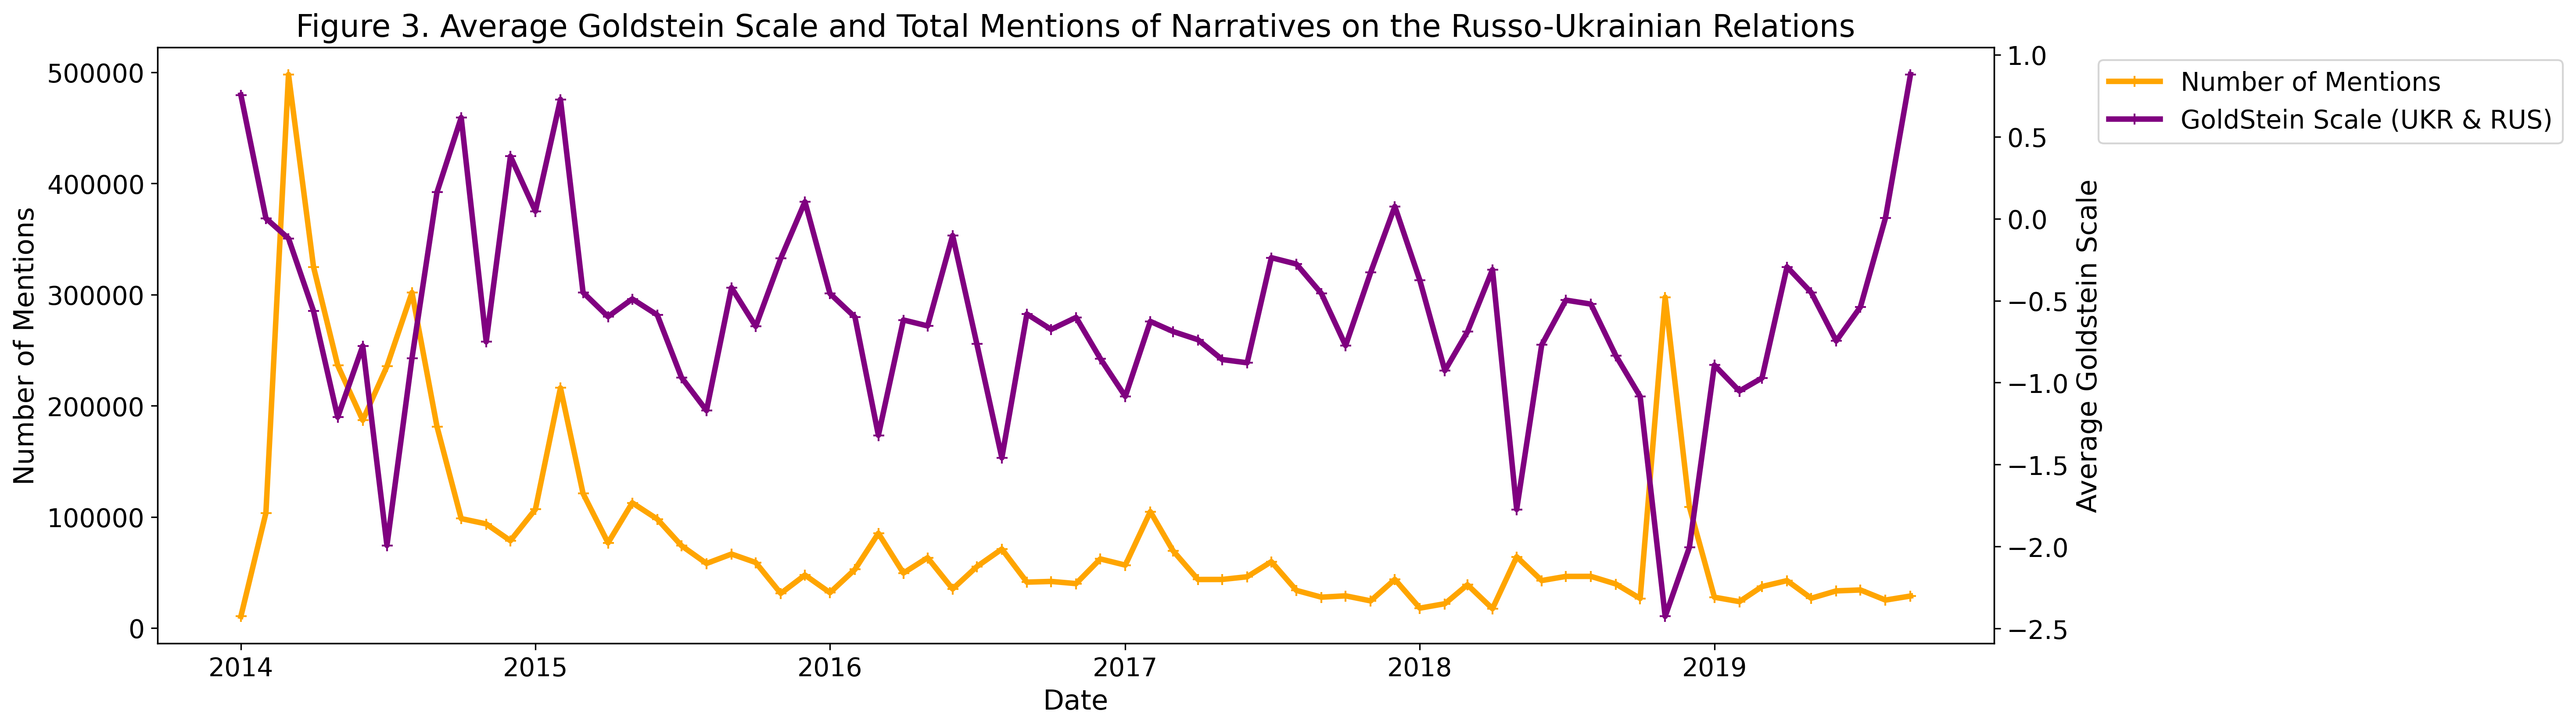

In [12]:
#Show the plot that shows the Goldstein scales and Num of mentions
#among Russo-Ukrainian relations
%matplotlib inline
fig, ax = plt.subplots(figsize=(18,6), dpi=300)


ax.plot(rus_ukr_goldstein['MonthYear'], rus_ukr_goldstein['NumMentions'],
         color='orange', marker='+', lw=3, label='Number of Mentions')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Number of Mentions', fontsize=15)

ax2=ax.twinx()
ax2.plot(rus_ukr_goldstein['MonthYear'], rus_ukr_goldstein['GoldSteinScale'],
         color='purple', marker='+', lw=3, label='GoldStein Scale (UKR & RUS)')
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('Average Goldstein Scale', fontsize=15)


plt.title('Figure 3. Average Goldstein Scale and Total Mentions '
          'of Narratives on the Russo-Ukrainian Relations',
          fontsize=17)

ax.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels, fontsize=14, bbox_to_anchor=[1.05,1])
plt.show()

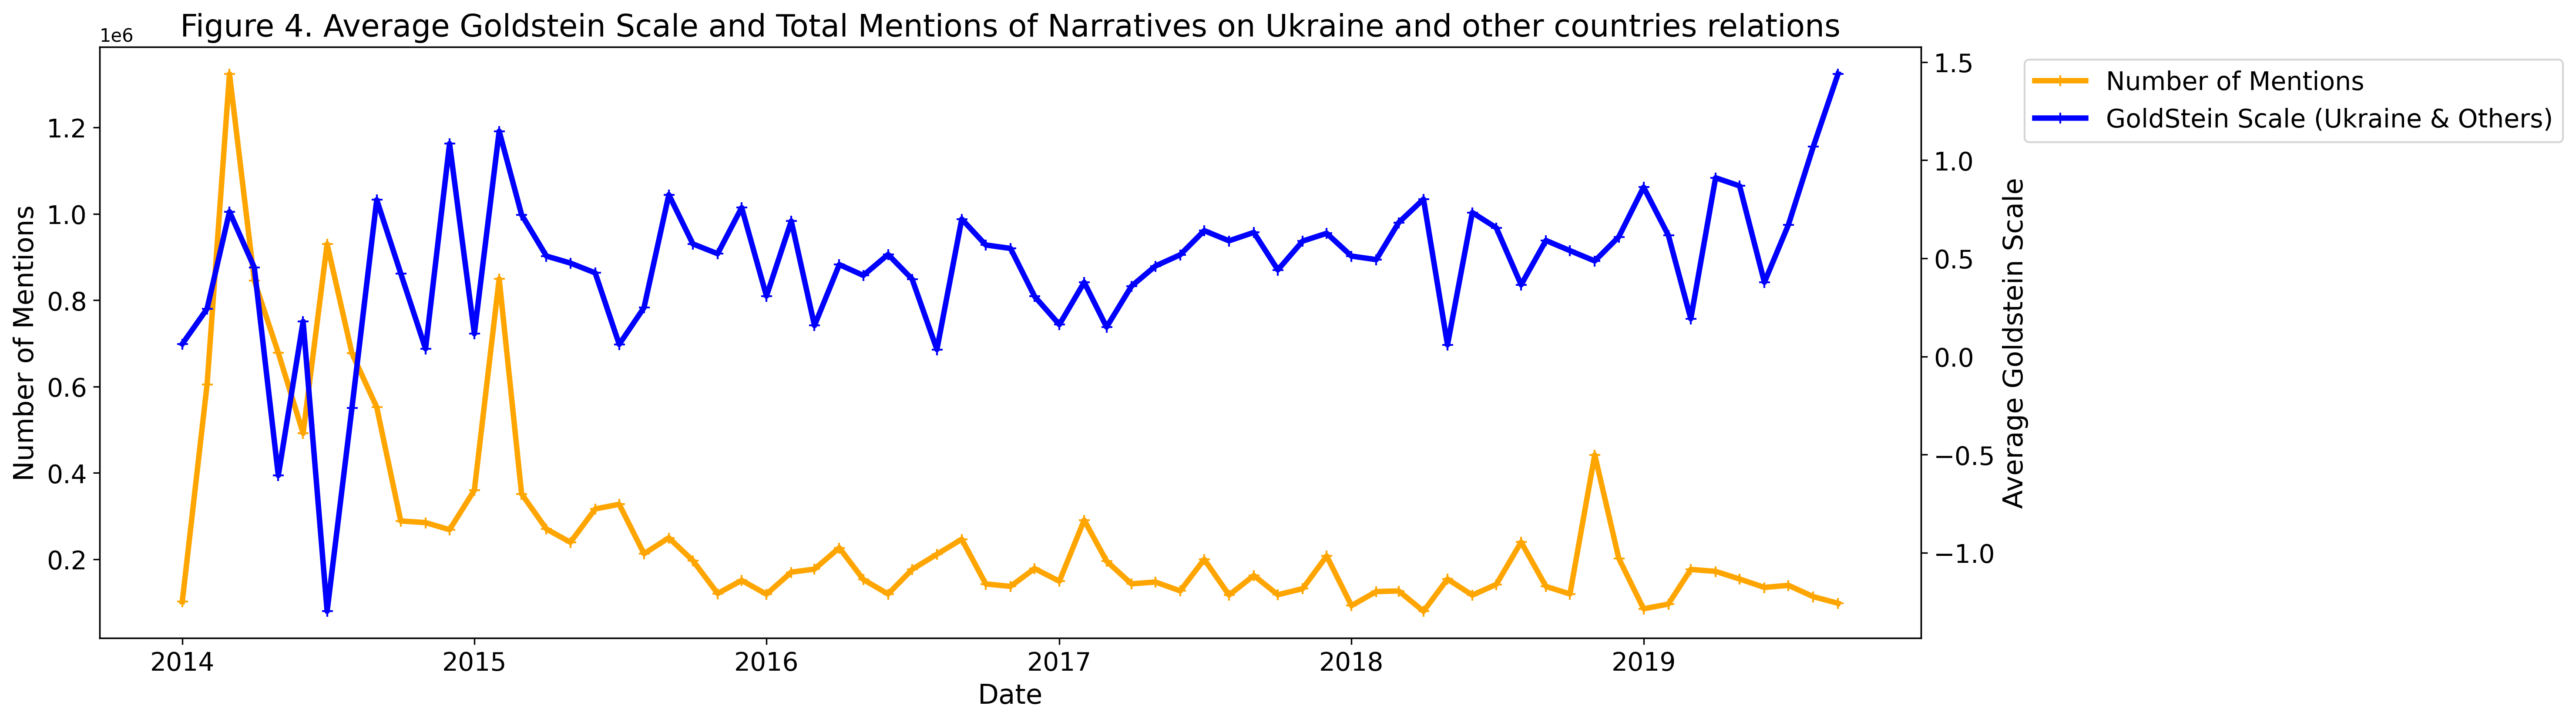

In [14]:
#Show the plot that shows the Goldstein scales and Num of mentions
#among Ukraine and other countries' relations
%matplotlib inline
fig, ax = plt.subplots(figsize=(18,6), dpi=300)


ax.plot(ukr_others_goldstein['MonthYear'], ukr_others_goldstein['NumMentions'],
         color='orange', marker='+', lw=3, label='Number of Mentions')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Number of Mentions', fontsize=15)

ax2=ax.twinx()
ax2.plot(ukr_others_goldstein['MonthYear'], ukr_others_goldstein['GoldSteinScale'],
         color='blue', marker='+', lw=3, label='GoldStein Scale (Ukraine & Others)')
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('Average Goldstein Scale', fontsize=15)


plt.title('Figure 4. Average Goldstein Scale and Total Mentions '
          'of Narratives on Ukraine and other countries relations',
          fontsize=17)

ax.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels, fontsize=14, bbox_to_anchor=[1.05,1])
plt.show()


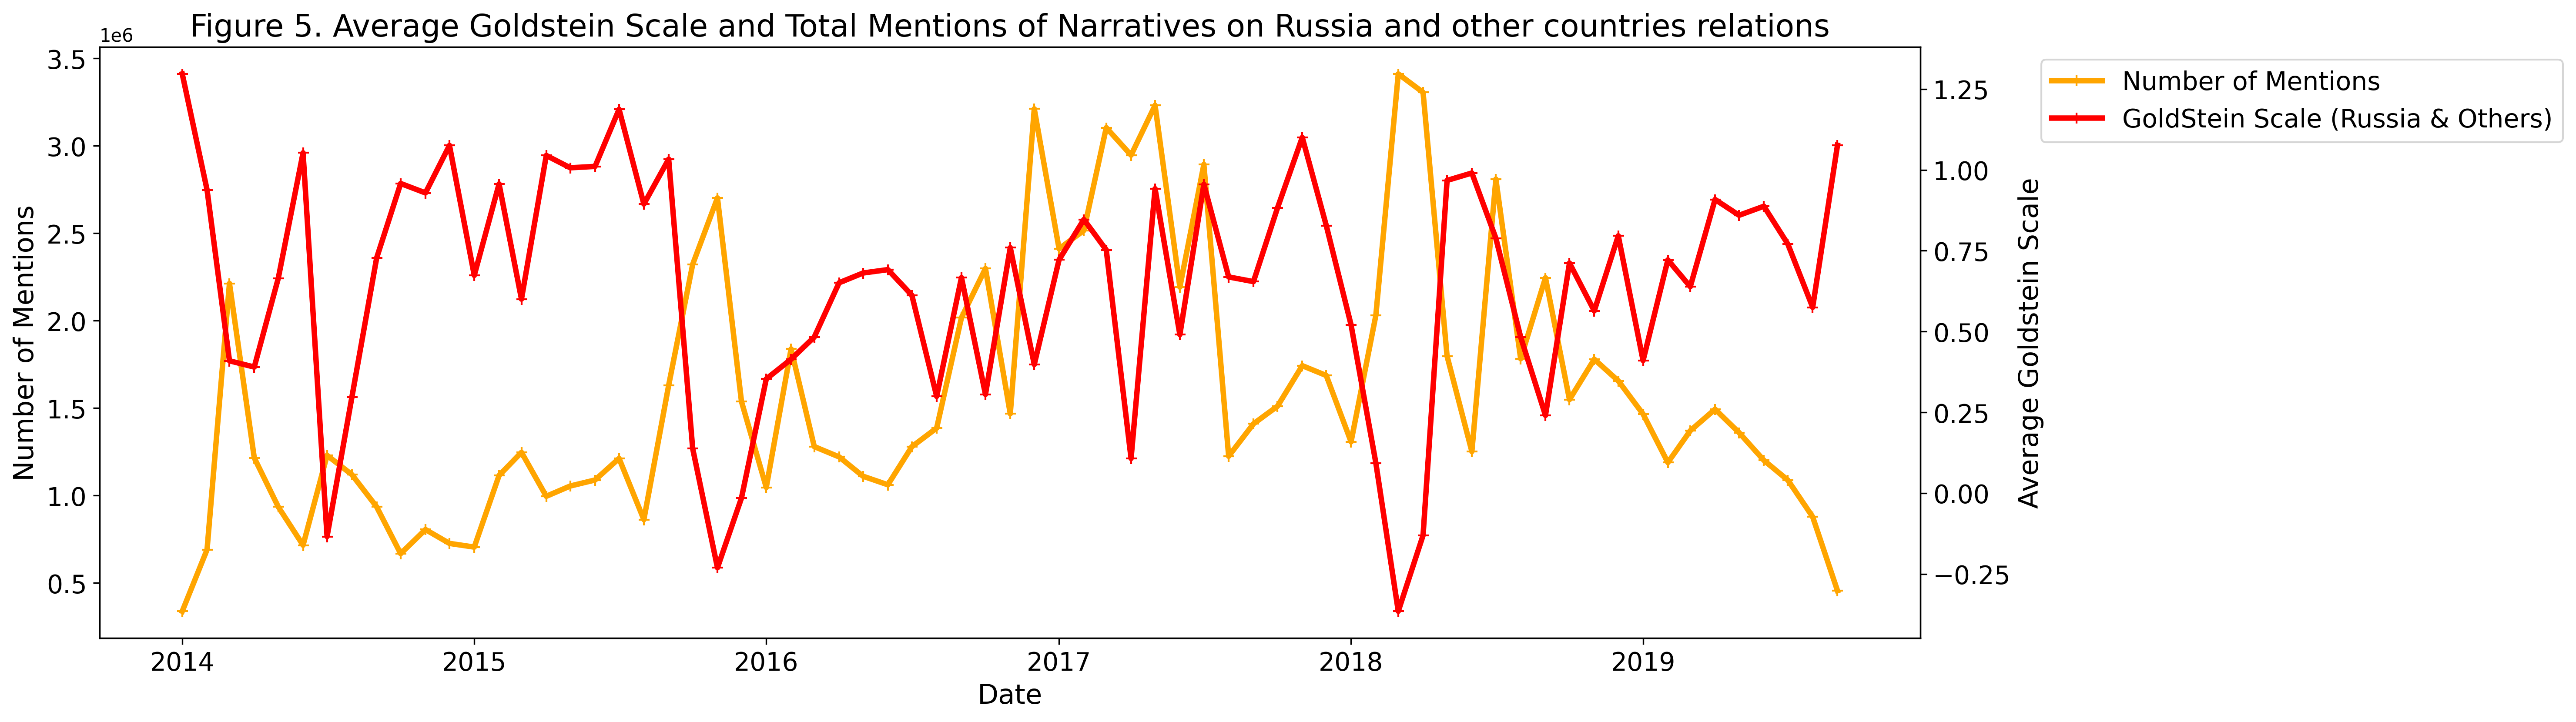

In [15]:
#Show the plot that shows the Goldstein scales and Num of mentions
#among Russia and other countries' relations
%matplotlib inline
fig, ax = plt.subplots(figsize=(18,6), dpi=300)


ax.plot(rus_others_goldstein['MonthYear'], rus_others_goldstein['NumMentions'],
         color='orange', marker='+', lw=3, label='Number of Mentions')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Number of Mentions', fontsize=15)

ax2=ax.twinx()
ax2.plot(rus_others_goldstein['MonthYear'], rus_others_goldstein['GoldSteinScale'],
         color='red', marker='+', lw=3, label='GoldStein Scale (Russia & Others)')
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('Average Goldstein Scale', fontsize=15)


plt.title('Figure 5. Average Goldstein Scale and Total Mentions '
          'of Narratives on Russia and other countries relations',
          fontsize=17)

ax.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels, fontsize=14, bbox_to_anchor=[1.36,1])
plt.show()


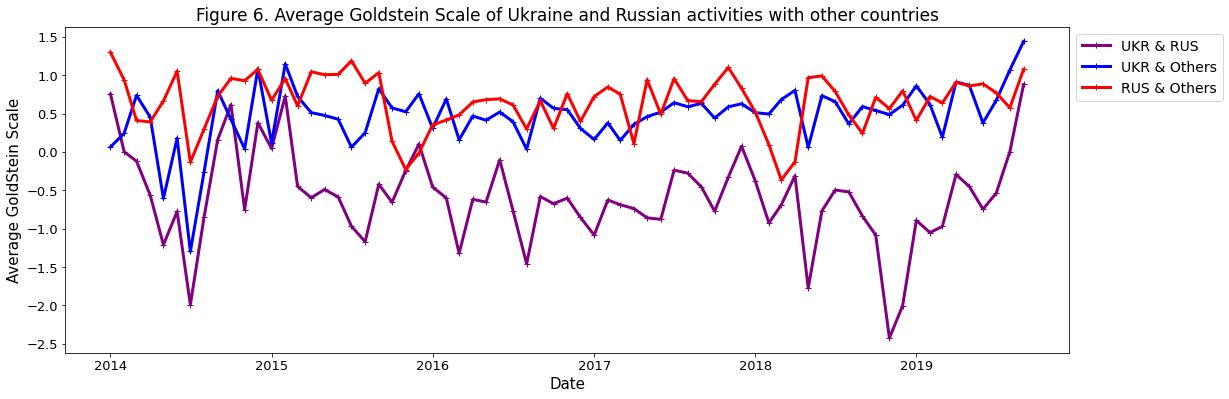

In [16]:
#Show the plot that shows the Avg Goldstein scales
#among Russo-Ukrainian, Russian & other countries
#Ukrainian & other countries' relations

%matplotlib inline

plt.figure(figsize=(18,6))
plt.plot(rus_ukr_goldstein['MonthYear'], rus_ukr_goldstein['GoldSteinScale'],
         color='purple', marker='+', lw=3, label='UKR & RUS')
plt.plot(ukr_others_goldstein['MonthYear'], ukr_others_goldstein['GoldSteinScale'],
         color='blue', marker='+', lw=3, label='UKR & Others')
plt.plot(rus_others_goldstein['MonthYear'], rus_others_goldstein['GoldSteinScale'],
         color='red', marker='+', lw=3, label='RUS & Others')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Average GoldStein Scale', fontsize=15)
plt.legend(bbox_to_anchor=[1,1], fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.title('Figure 6. Average Goldstein Scale of Ukraine and Russian'
           ' activities with other countries', fontsize=17)
plt.show()